In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import exp
from numpy import sin
from numpy import tanh


In [181]:
def e(z):
    #return 0.4
    #return sin(z*10)/2 + 0.5
    return 1-fraction_data[np.where(depth == z)[0]]

In [4]:
def H(z):
    return -tanh(((c2+c1)*(z-(c2+c1)/2))/(c2-c1))

In [5]:
def l (z,s,a1,b1,a2,b2):
    return e(z)/(1+exp(-a1*s+b1)) + (1-e(z))/(1+exp(-a2*s+b2))

In [6]:
def l_diff(z,s,a1,b1,a2,b2):
    return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2 

In [7]:
def integral(s,z,a1,a2,b1,b2):
    return H(z-s)*l_diff(z,s,a1,b1,a2,b2)

In [8]:
def functional_integration(z,a1,a2,b1,b2):        
    return quad(integral, 0, z, args=(z,a1,a2,b1,b2))[0]

In [182]:
def get_magnetisation(z,a1,a2,b1,b2):
    vec_expint = np.vectorize(functional_integration)
    M = vec_expint(z,a1,a2,b1,b2)
    
    return tanh(M*10**3)
    #return M

In [164]:
depth , fraction_data = np.loadtxt('ez.txt', unpack = True)

In [202]:
#a1 = 8.9
#a2 = 1.8
#b1 = 5.6
#b2 = 7.2

c1 = 73
c2 = 74.5


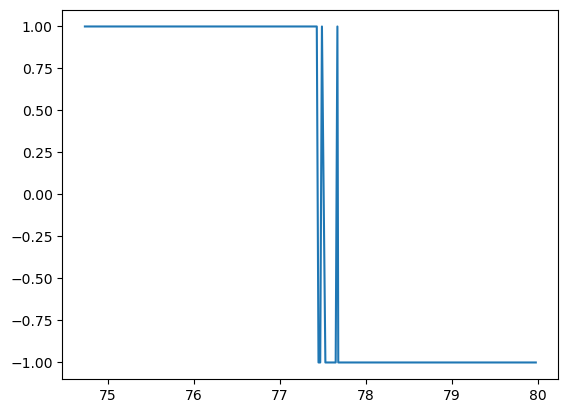

In [203]:
M = get_magnetisation(depth,1.9,3.1,8,5)
#M = get_magnetisation(depth,8.9,1.8,5.6,7.2)
plt.plot(depth,M)

In [166]:
z = np.linspace(0,10)

In [205]:
popt, pcov = curve_fit(get_magnetisation, depth, M, bounds = (0.,[10.,2.,6.,8.]))
perr = np.sqrt(np.diag(pcov))

In [206]:
popt

array([5., 1., 3., 4.])

In [207]:
perr

array([0., 0., 0., 0.])

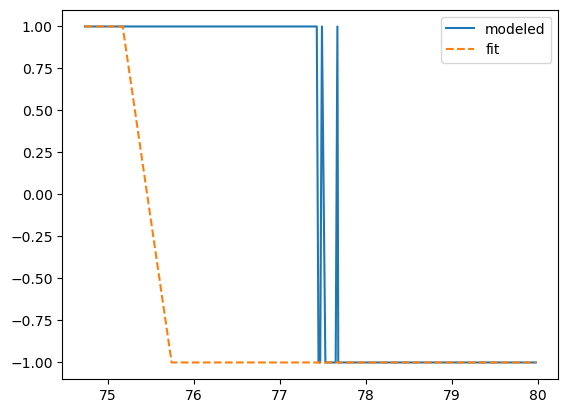

In [210]:
plt.plot(depth,M,label = 'modeled')
plt.plot(depth,get_magnetisation(depth,popt[0],popt[1],popt[2],popt[3]),label = 'fit',linestyle = 'dashed')
plt.legend()
plt.savefig('test')
plt.show()

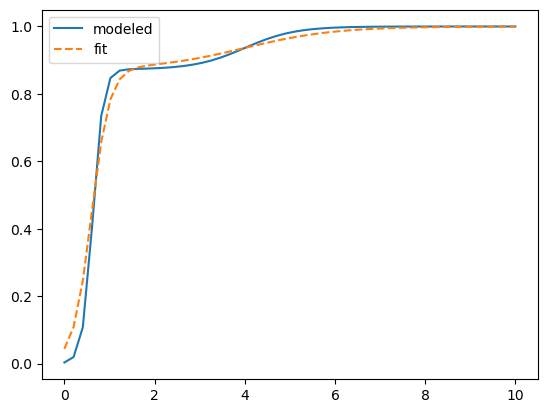

In [160]:
l_initial = l(4,z,8.9,5.6,1.8,7.2)
l_fit = l(4,z,popt[0],popt[2],popt[1],popt[3])

plt.plot(z,l_initial,label = 'modeled')
plt.plot(z,l_fit,label = 'fit',linestyle = 'dashed')
plt.legend()
plt.savefig('test_lock-in')
plt.show()